In [1]:
import pandas as pd
import numpy as np 

import seaborn as sns
import matplotlib.pyplot as plt

import prepare as pr 
import math

from sklearn.model_selection import train_test_split
import sklearn.model_selection

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Import Data

In [3]:
import sketch

In [4]:
df = pr.prep_data('all_books .csv')

In [5]:
df.head(5)

,title,summary,year_published,author,review_count,number_of_ratings,length,genre,rating,reviews,cleaned_title,cleaned_summary,target,lemmatized_summary,neg,neutral,pos,compound,sentiment
0,1491,"In this groundbreaking work of science, histor...",back,Charles C. Mann,4581,81796,1492.0,History,4.04,NaN,1491,"in this groundbreaking work of science, histor...",unsuccessful,groundbreaking science history archaeology cha...,0.021,0.848,0.132,0.9393,very positive
1,1493,From the author of 1491—the best-selling study...,2011,Charles C. Mann,1603,18476,557.0,History,4.11,NaN,1493,from the author of 1491the bestselling study o...,unsuccessful,author bestselling study precolumbian americas...,0.044,0.869,0.088,0.9213,very positive
2,1776,"In this masterful book, David McCullough tells...",2005,David McCullough,8098,219448,386.0,History,4.08,NaN,1776,"in this masterful book, david mccullough tells...",unsuccessful,masterful david mccullough tell intensely huma...,0.097,0.835,0.068,-0.8309,very negative
3,2312,The year is 2312. Scientific and technological...,2012,Kim Stanley Robinson,2520,19150,561.0,Science Fiction,3.50,NaN,2312,the year is 2312. scientific and technological...,unsuccessful,year scientific technological advance open gat...,0.104,0.846,0.051,-0.7935,very negative
4,2666,"A cuatro profesores de literatura, Pelletier, ...",2004,Roberto Bolaño,4554,38750,1128.0,Fiction,4.19,NaN,2666,"a cuatro profesores de literatura, pelletier, ...",unsuccessful,cuatro profesores de literatura pelletier mori...,0.023,0.962,0.015,-0.3182,negative


In [6]:
train, split = pr.split(df) 

### How many are successful and not successful

In [7]:
unsuccessful, successful = train.target.value_counts()

In [8]:
unsuccessful, successful

(2919, 129)

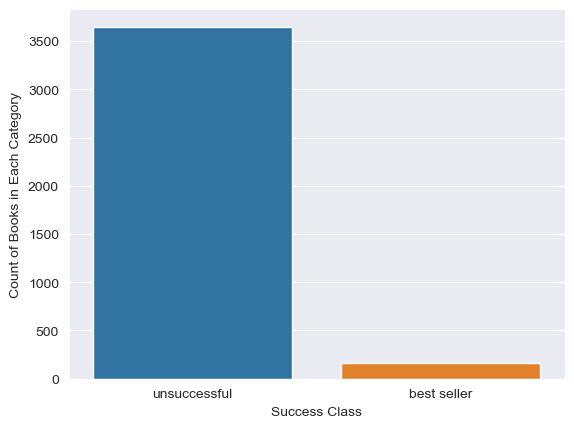

In [9]:

# Set Seaborn style
sns.set_style('darkgrid')

# Construct plot
sns.countplot(x = "target", data = df)
plt.ylabel('Count of Books in Each Category')
plt.xlabel('Success Class')
plt.show()

In [10]:
df.head(1)

,title,summary,year_published,author,review_count,number_of_ratings,length,genre,rating,reviews,cleaned_title,cleaned_summary,target,lemmatized_summary,neg,neutral,pos,compound,sentiment
0,1491,"In this groundbreaking work of science, histor...",back,Charles C. Mann,4581,81796,1492.0,History,4.04,NaN,1491,"in this groundbreaking work of science, histor...",unsuccessful,groundbreaking science history archaeology cha...,0.021,0.848,0.132,0.9393,very positive


### what authors are having the most success

In [11]:
top_authors = train['author'].value_counts().head(10).index.tolist()

In [12]:
top_authors

['J.D. Robb',
 'Stephen King',
 'Terry Pratchett',
 'Rick Riordan',
 'Cora Reilly',
 'Louise Penny',
 'P.C. Cast',
 'Nicholas Sparks',
 'Kelley Armstrong',
 'Jodi Picoult']

In [13]:
filtered_df = train[train['author'].isin(top_authors)]

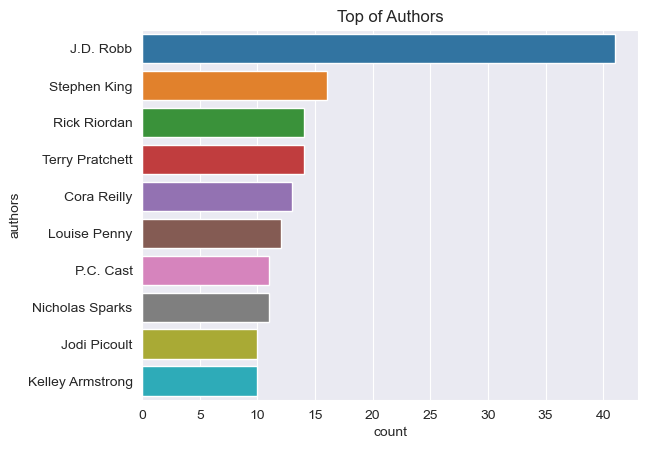

In [14]:
# Construct plot
sns.countplot(y='author', data=filtered_df, order=filtered_df['author'].value_counts().index)

plt.title('Top of Authors')
plt.ylabel('Appearances on List')
plt.ylabel('authors')
plt.show()

In [15]:
unsuccessful = train[train.target == "unsuccessful" ]

In [16]:
best = train[train.target == "best seller" ]

### average rating per best subset

In [17]:
best['rating'].min()

3.3

In [18]:
best['rating'].mean()

4.106511627906976

In [19]:
best['rating'].max()

4.76

### average rating per unsuccessful subset

In [20]:
unsuccessful['rating'].min()

2.55

In [21]:
unsuccessful['rating'].mean()

4.007708119218909

In [22]:
unsuccessful['rating'].max()

4.8

# average length for best

In [23]:
len_null = df[df.length.isna()]

In [24]:
best['length']


2797     352.0
2952     825.0
3320     356.0
2336     398.0
1961     356.0
         ...  
1781     342.0
2947    1237.0
3532     389.0
901      477.0
3341     488.0
Name: length, Length: 129, dtype: float64

In [25]:
best['length'].mean()

474.28682170542635

In [26]:
best['length'].max()

1237.0

In [27]:
df[df['length'] == 1237]

,title,summary,year_published,author,review_count,number_of_ratings,length,genre,rating,reviews,cleaned_title,cleaned_summary,target,lemmatized_summary,neg,neutral,pos,compound,sentiment
2947,World Without End,Librarian's note: An alternate cover edition c...,2007,Ken Follett,12711,234211,1237.0,Historical Fiction,4.29,NaN,world without end,librarian's note an alternate cover edition ca...,best seller,librarian note alternate cover find hereworld ...,0.185,0.702,0.113,-0.9239,very negative


# average length for unsuccessful

In [28]:
unsuccessful['length'].min()

4.0

In [29]:
train[train['length'] == 1]

,title,summary,year_published,author,review_count,number_of_ratings,length,genre,rating,reviews,cleaned_title,cleaned_summary,target,lemmatized_summary,neg,neutral,pos,compound,sentiment


In [30]:
unsuccessful['length'].mean()

6.667351584688252e+16

In [31]:
unsuccessful['length'].max()

1.9461997350000024e+20

In [32]:
df[df['length'] == 185019311970]

,title,summary,year_published,author,review_count,number_of_ratings,length,genre,rating,reviews,cleaned_title,cleaned_summary,target,lemmatized_summary,neg,neutral,pos,compound,sentiment
490,Cloud Atlas,A postmodern visionary who is also a master of...,back,David Mitchell,21141,239367,1.850193e+11,Fiction,4.01,NaN,cloud atlas,a postmodern visionary who is also a master of...,unsuccessful,postmodern visionary also master style genres ...,0.05,0.849,0.101,0.9287,very positive


# best book compound 

In [33]:
best['compound'].min()

-0.9969

In [34]:
best['compound'].mean()

-0.19175116279069765

In [35]:
best['compound'].max()

0.9955

# unsuccessful book compound 

In [36]:
unsuccessful['compound'].min()

-0.9995

In [37]:
unsuccessful['compound'].mean()

0.16599845837615598

In [38]:
unsuccessful['compound'].max()

0.9996


# how is the sentiment spread out`

<AxesSubplot:xlabel='sentiment', ylabel='count'>

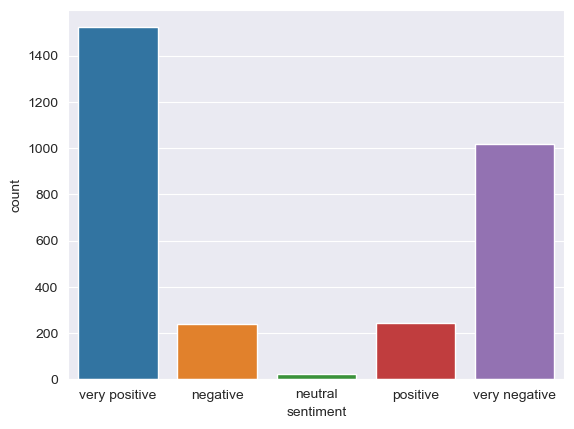

In [39]:
sns.countplot(x = 'sentiment', data =train)

<AxesSubplot:xlabel='compound', ylabel='sentiment'>

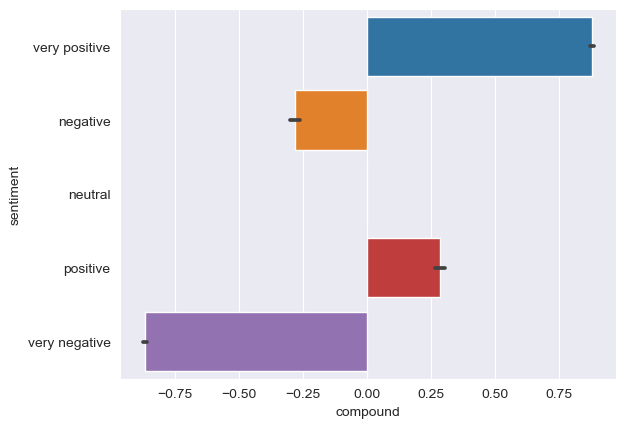

In [40]:
sns.barplot(x = 'compound',y= 'sentiment', data = train)

<AxesSubplot:xlabel='sentiment', ylabel='compound'>

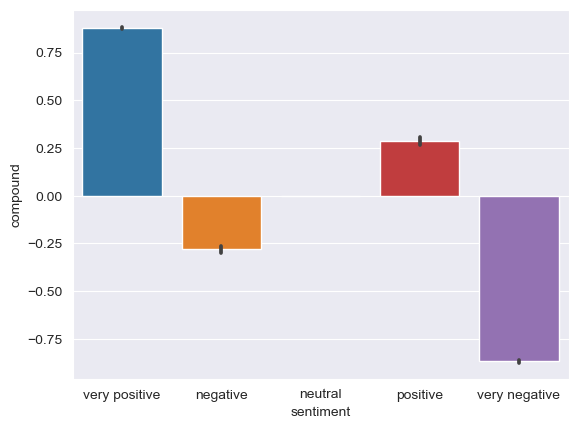

In [41]:
sns.barplot(x = 'sentiment',y= 'compound', data = train) 

# NLP EXPLORATION

In [42]:
unsuccessful = train[train.target == 'unsuccessful'] 

In [43]:
best = train[train.target == 'best seller'] 

In [44]:
labels = pd.concat([train.sentiment.value_counts(),train.sentiment.value_counts(normalize=True)],axis = 1)
labels.columns = ['sentiment','%']
labels

,sentiment,%
very positive,1522,0.499344
very negative,1019,0.334318
positive,244,0.080052
negative,238,0.078084
neutral,25,0.008202


In [45]:
labels = pd.concat([train.target.value_counts(),train.target.value_counts(normalize=True)],axis = 1)
labels.columns = ['Count ','%'] 
labels

,Count,%
unsuccessful,2919,0.957677
best seller,129,0.042323


In [46]:
best_words = pd.Series(' '.join(best.lemmatized_summary).split(' ')).value_counts()

In [47]:
unsuccessful_words = pd.Series(' '.join(unsuccessful.lemmatized_summary).split(' ')).value_counts()

In [48]:
all_words = pd.Series(' '.join(train.lemmatized_summary).split(' ')).value_counts()

In [49]:
word_counts = (pd.concat([all_words, best_words, unsuccessful_words], axis=1, sort=True)
                .set_axis(['all', 'best', 'unsuccessful'], axis=1, inplace=False)
                .fillna(0)
                .apply(lambda s: s.astype(int)))

word_counts


,all,best,unsuccessful
,2,0,2
aa,1,1,0
aahz,1,0,1
aanen,1,0,1
aarav,1,0,1
...,...,...,...
zuni,1,0,1
zusak,2,0,2
zuversicht,2,0,2
zwanzig,1,0,1


# What are the most frequently occuring words?

In [50]:
word_counts.sort_values(by='all', ascending=False).head(10)


,all,best,unsuccessful
life,2104,81,2023
one,1986,86,1900
world,1526,59,1467
find,1309,72,1237
time,1258,73,1185
love,1251,69,1182
year,1041,36,1005
make,1022,39,983
family,929,49,880
take,923,41,882


In [51]:
word_counts.sort_values(by='best', ascending=False).head(10)

,all,best,unsuccessful
one,1986,86,1900
life,2104,81,2023
time,1258,73,1185
find,1309,72,1237
love,1251,69,1182
world,1526,59,1467
family,929,49,880
woman,897,45,852
two,658,42,616
secret,628,42,586


In [52]:
word_counts.sort_values(by='unsuccessful', ascending=False).head(10)

,all,best,unsuccessful
life,2104,81,2023
one,1986,86,1900
world,1526,59,1467
find,1309,72,1237
time,1258,73,1185
love,1251,69,1182
year,1041,36,1005
make,1022,39,983
take,923,41,882
family,929,49,880


Text(0.5, 1.0, 'Proportion of unsuccessful vs best for the 20 most common words')

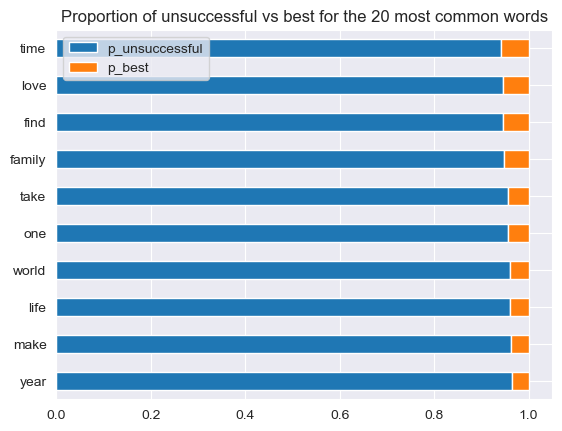

In [53]:
# figure out the percentage of spam vs ham
(word_counts
 .assign(p_unsuccessful = word_counts.unsuccessful / word_counts['all'],
         p_best = word_counts.best / word_counts['all'])
 .sort_values(by='all')
 [['p_unsuccessful', 'p_best']]
 .tail(10)
 .sort_values('p_best')
 .plot.barh(stacked=True))

plt.title('Proportion of unsuccessful vs best for the 20 most common words')

# Are there any words that uniquely identify a best or unsuccessful book?

In [54]:
unique_vals = pd.concat([word_counts[word_counts.best == 0].sort_values(by='best').tail(100),
           word_counts[word_counts.unsuccessful == 0].sort_values(by='unsuccessful').tail(100)])


In [55]:
unique_vals.sketch.howto('find where all of columns best has some value, and unsuccessful has the value 0')

In [56]:
best_uni = unique_vals.loc[(unique_vals['best'] > 0) & (unique_vals['unsuccessful'] == 0)]

In [57]:
best_uni = best_uni.sort_values(by = 'best',ascending = False)

In [58]:
best_uni.best

kirsch               7
haller               6
evanovich            4
f                    4
kya                  3
                    ..
finder               1
finchscoutreturns    1
feint                1
feared               1
epping               1
Name: best, Length: 100, dtype: int64

# Unique best words`

<AxesSubplot:xlabel='best', ylabel='count'>

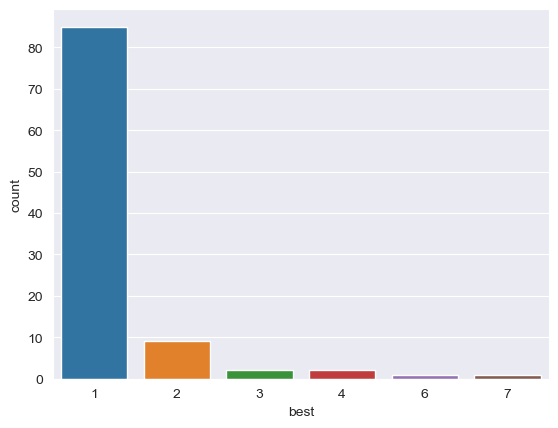

In [59]:
sns.countplot(x= 'best', data = best_uni)

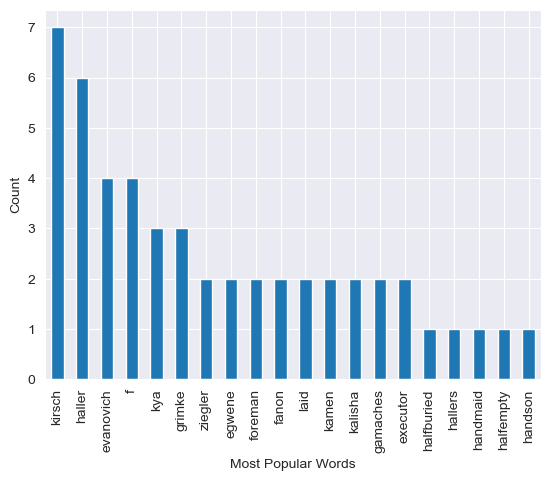

In [60]:
# plot the 'best' column
best_uni['best'].head(20).plot(kind='bar')

# set the x-axis label
plt.xlabel('Most Popular Words')

# set the y-axis label
plt.ylabel('Count')

# show the plot
plt.show()

In [61]:
best_uni
# kirsh is alcohol
# evanovich is an author
# 

,all,best,unsuccessful
kirsch,7,7,0
haller,6,6,0
evanovich,4,4,0
f,4,4,0
kya,3,3,0
...,...,...,...
finder,1,1,0
finchscoutreturns,1,1,0
feint,1,1,0
feared,1,1,0


In [62]:
best.lemmatized_summary

2797    internationally bestselling pulitzer prizewinn...
2952    june world seem turn upsidedown british army w...
3320    homicide detective eve dallas must untangle tw...
2336    ira levinson trouble ninetyone year old poor h...
1961    jack mullen drive student law brother peter se...
                              ...                        
1781    mercy thompson car mechanic shapeshifter never...
2947    librarian note alternate cover find hereworld ...
3532    nicolae carpathia dead kill antichrist answer ...
901     alternate cover find herewhen willow bear seve...
3341    seventh karon beloved series available paperba...
Name: lemmatized_summary, Length: 129, dtype: object

In [63]:
(' '.join(best.lemmatized_summary))

'internationally bestselling pulitzer prizewinning author superbly craft fiction eight storieslonger emotionally complex yet writtenthat take u cambridge seattle india thailand enter live sister brother father mother daughter son friend stun ruma young mother city visit father carefully tend earth garden grandson form special bond he harbor secret daughter love affair he keep choice accommodation husband attempt turn old friend wed romantic getaway weekend wife take dark reveal turn party last deep night goodness sister eager give younger brother perfect childhood never overwhelm guilt anguish anger alcoholism threaten family hema kaushik trio link storiesa luminous intensely compel elegy life death love fatewe follow live girl boy one winter share house massachusetts travel innocence experience separate sometimes painful path destiny bring together year later rome unaccustomed earth rich jhumpa lahiris signature gift exquisite prose emotional wisdom subtle rendering intricate working 

In [64]:
best_sent = (' '.join(best.lemmatized_summary))


In [65]:
bigrams = nltk.ngrams(best_sent.split(), 2)
list(bigrams)

[('internationally', 'bestselling'),
 ('bestselling', 'pulitzer'),
 ('pulitzer', 'prizewinning'),
 ('prizewinning', 'author'),
 ('author', 'superbly'),
 ('superbly', 'craft'),
 ('craft', 'fiction'),
 ('fiction', 'eight'),
 ('eight', 'storieslonger'),
 ('storieslonger', 'emotionally'),
 ('emotionally', 'complex'),
 ('complex', 'yet'),
 ('yet', 'writtenthat'),
 ('writtenthat', 'take'),
 ('take', 'u'),
 ('u', 'cambridge'),
 ('cambridge', 'seattle'),
 ('seattle', 'india'),
 ('india', 'thailand'),
 ('thailand', 'enter'),
 ('enter', 'live'),
 ('live', 'sister'),
 ('sister', 'brother'),
 ('brother', 'father'),
 ('father', 'mother'),
 ('mother', 'daughter'),
 ('daughter', 'son'),
 ('son', 'friend'),
 ('friend', 'stun'),
 ('stun', 'ruma'),
 ('ruma', 'young'),
 ('young', 'mother'),
 ('mother', 'city'),
 ('city', 'visit'),
 ('visit', 'father'),
 ('father', 'carefully'),
 ('carefully', 'tend'),
 ('tend', 'earth'),
 ('earth', 'garden'),
 ('garden', 'grandson'),
 ('grandson', 'form'),
 ('form', 'spe

In [66]:

bigrams = pd.Series(nltk.ngrams(best_sent.split(), 2)).value_counts().head(20)
bigrams 

(time, bestselling)      17
(eve, dallas)            14
(bestselling, author)    14
(armand, gamache)        10
(stephanie, plum)         9
(alternate, cover)        8
(young, woman)            8
(du, quebec)              7
(surete, du)              7
(bounty, hunter)          7
(fall, love)              6
(time, bestseller)        6
(three, pine)             6
(lieutenant, eve)         5
(reader, around)          5
(high, school)            5
(husband, roarke)         5
(nineteen, minute)        5
(million, reader)         5
(chief, inspector)        5
dtype: int64

<div class="alert alert-block alert-success">
<b>TAKEAWAY:</b> 
        
Looking at bi grams, I see...
____________________________


* bestselling author, maybe people are inclined to buy books from someone who has already been on the list  


* alot of character names, (eve, dallas(in death series)) ,(armand, gamache(still life)(location three pine))  


* Sûreté du Québec is the provincial police service  
</div>

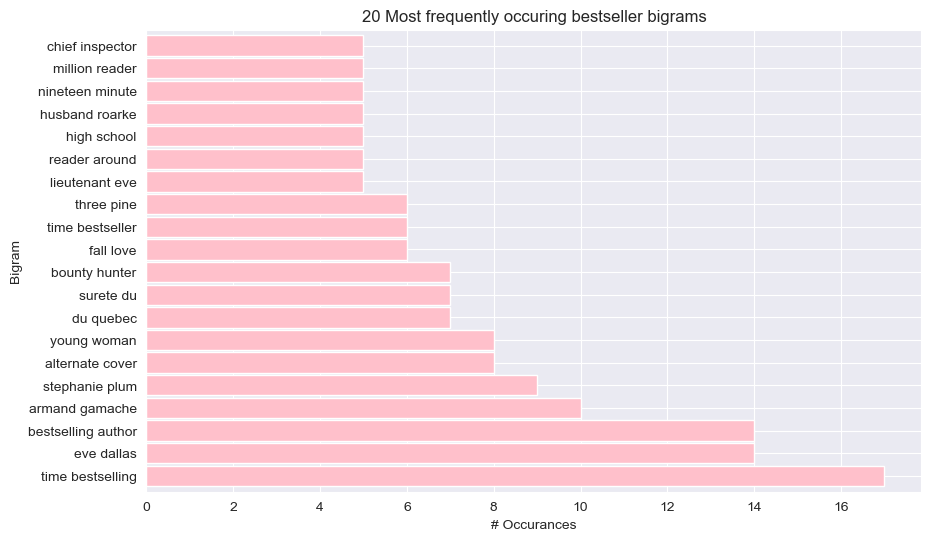

In [67]:
bigrams.sort_values(ascending=False).plot.barh(color='pink', width=.9, figsize=(10, 6))

plt.title('20 Most frequently occuring bestseller bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = bigrams .reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)
